In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df=pd.read_csv("breast-cancer.csv")
df.head()
# diagnosis is the dependent variable, M means cancerous and B means non cancerous

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
dataset =df.drop(['id'],axis=1).replace(
    {'diagnosis':
                {
                    'B': 1,
                    'M': 0,
                }
    }
)
dataset.info()
# the dependent variable's values has changed to 1 and 0
# 1 means no cancer
# 0 means there is cancer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [48]:
df.shape

(569, 32)

In [49]:
dataset.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
94,0,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,...,18.23,24.23,123.50,1025.0,0.15510,0.42030,0.52030,0.21150,0.2834,0.08234
38,0,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
503,0,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,...,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
66,1,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,...,10.41,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
477,1,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
211,1,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,...,13.30,24.99,85.22,546.3,0.12800,0.18800,0.14710,0.06913,0.2535,0.07993
267,1,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.10050,0.17300,0.14530,0.06189,0.2446,0.07024
118,0,15.780,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,...,20.19,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
228,1,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,...,14.20,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585
420,1,11.570,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284


<Axes: >

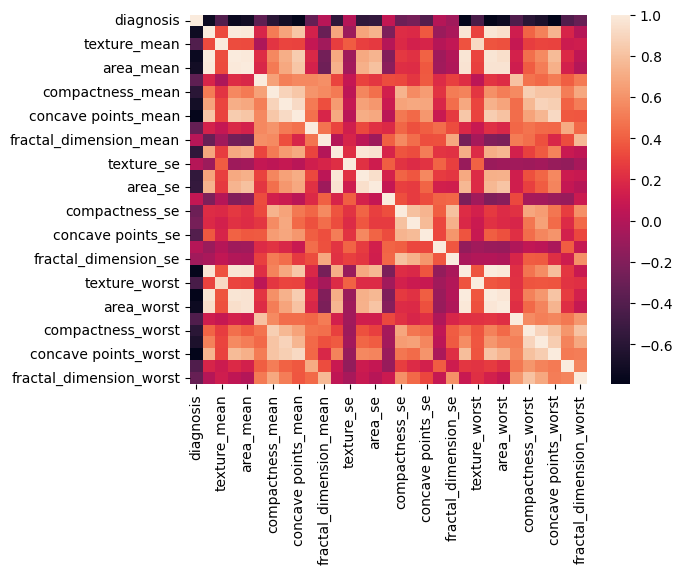

In [50]:
sns.heatmap(dataset.corr(),)

In [51]:
# splitting dataset into train data and test data
dataset['bias'] = 1
X = dataset.drop(['diagnosis'], axis=1).to_numpy()
Y = dataset['diagnosis'].to_numpy()
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [52]:
n = len(test_Y)

In [53]:
#Decision tree
decision_tree = DecisionTreeClassifier().fit(train_X, train_Y)
print(f'accuracy = {np.sum(decision_tree.predict(test_X) == test_Y)/n}')

accuracy = 0.9473684210526315


In [54]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier().fit(train_X, train_Y)
print(f'accuracy = {np.sum(random_forest.predict(test_X) == test_Y)/n}')

accuracy = 0.956140350877193


In [55]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000).fit(train_X, train_Y)
print(f'accuracy = {np.sum(logistic_regression.predict(test_X) == test_Y)/n}')

accuracy = 0.956140350877193


In [55]:
# there are different ways to look into the accuracy. In this program there are three ways to find the accuracy. among those three method,
# random forest and logistic regression shows equal and high accuracy.


In [57]:
# predicting train and test data
y_train_pred = random_forest.predict(train_X)
y_test_pred = random_forest.predict(test_X)
print(y_test_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(test_Y,y_test_pred)
score=r2_score(test_Y,y_test_pred)
print("R2 is : ",score)
print("Mean absolute error is :",mae)

R2 is :  0.8132983950212905
Mean absolute error is : 0.043859649122807015


# r2 is 0.81, which means the model is a good model. the model can explain 81 percentage of the variation the dependent variable.
# mean square error is nothing but the mean square of difference between the actual and predicted values.
# here MAE is also less, So that the model is good.

In [61]:
# getting recall and precision for test predictions
test_TP = matrix_test[0][0]
test_FP = matrix_test[0][1]
test_FN = matrix_test[1][0]
test_TN = matrix_test[1][1]

test_precision = test_TP/(test_TP+test_FP)
test_recall = test_TP/(test_TP+test_FN)

print('Recall and Precision: {}, {}'.format(round(test_recall, 4), round(test_precision, 4)))

Recall and Precision: 0.9091, 0.9346


In [62]:
# F1 score
# F1 score is useful when you want a balance between precision and recall.
f1=(2*test_recall*test_precision)/(test_recall+test_precision)
print(f1)

0.9216589861751152
